In [72]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField
from pyspark.sql.types import IntegerType, StringType, FloatType, Row

from pyspark.sql import SQLContext

In [2]:
sc = SparkContext(master='local', appName="OlympicDataframes")
sqlContext = SQLContext(sc)

In [3]:
sc

<SparkContext master=local appName=OlympicDataframes>

In [4]:
!ls files

deporte.csv	 deportistaError.csv  modelo_relacional.jpg
deportista2.csv  evento.csv	      paises.csv
deportista.csv	 juegos.csv	      resultados.csv


<img src='./files/modelo_relacional.jpg'>

### Dataframe from rdd

In [6]:
deportista_rdd = sc.textFile('files/deportista.csv')\
                    .map(lambda line: line.split(","))

deportista2_rdd = sc.textFile('files/deportista2.csv')\
                    .map(lambda line: line.split(","))

deportista_rdd += deportista2_rdd
deportista_rdd.take(5)

[['deportista_id', 'nombre', 'genero', 'edad', 'altura', 'peso', 'equipo_id'],
 ['1', 'A Dijiang', '1', '24', '180', '80', '199'],
 ['2', 'A Lamusi', '1', '23', '170', '60', '199'],
 ['3', 'Gunnar Nielsen Aaby', '1', '24', '0', '0', '273'],
 ['4', 'Edgar Lindenau Aabye', '1', '34', '0', '0', '278']]

In [19]:
header = deportista_rdd.first()
header

['deportista_id', 'nombre', 'genero', 'edad', 'altura', 'peso', 'equipo_id']

In [21]:
deportista_rdd = deportista_rdd.filter(lambda x: x != header)
deportista_rdd.take(5)

[['1', 'A Dijiang', '1', '24', '180', '80', '199'],
 ['2', 'A Lamusi', '1', '23', '170', '60', '199'],
 ['3', 'Gunnar Nielsen Aaby', '1', '24', '0', '0', '273'],
 ['4', 'Edgar Lindenau Aabye', '1', '34', '0', '0', '278'],
 ['5', 'Christine Jacoba Aaftink', '2', '21', '185', '82', '705']]

In [42]:
# Cast types of data
deportista_rdd = deportista_rdd.map(lambda x:
                  (int(x[0]),
                   x[1],
                   int(x[2]),
                   int(x[3]),
                   int(x[4]),
                   float(x[5]),
                   int(x[6])
                  ))


In [43]:
deportista_schema = StructType([
    StructField('deportista_id', IntegerType(), False),
    StructField('nombre', StringType(), False),
    StructField('genero', IntegerType(), False),
    StructField('edad', IntegerType(), False),
    StructField('altura', IntegerType(), False),
    StructField('peso', FloatType(), False),
    StructField('equipo_id', IntegerType(), False),
])

In [44]:
deportista_df = sqlContext.createDataFrame(deportista_rdd, deportista_schema)

In [58]:
deportista_df.show(4)

+-------------+--------------------+------+----+------+----+---------+
|deportista_id|              nombre|genero|edad|altura|peso|equipo_id|
+-------------+--------------------+------+----+------+----+---------+
|            1|           A Dijiang|     1|  24|   180|80.0|      199|
|            2|            A Lamusi|     1|  23|   170|60.0|      199|
|            3| Gunnar Nielsen Aaby|     1|  24|     0| 0.0|      273|
|            4|Edgar Lindenau Aabye|     1|  34|     0| 0.0|      278|
+-------------+--------------------+------+----+------+----+---------+
only showing top 4 rows



### equipos

In [59]:
equipos_schema = StructType([
    StructField('equipo_id', IntegerType(), False),
    StructField('sigla', StringType(), False),
    StructField('descripcion', StringType(), False),
])

In [60]:
equipos_df = sqlContext.read.schema(equipos_schema) \
                .option('header', 'true').csv('files/paises.csv')

In [61]:
equipos_df.show(5)

+---------+--------------------+-----------+
|equipo_id|               sigla|descripcion|
+---------+--------------------+-----------+
|        1|         30. Februar|        AUT|
|        2|A North American ...|        MEX|
|        3|           Acipactli|        MEX|
|        4|             Acturus|        ARG|
|        5|         Afghanistan|        AFG|
+---------+--------------------+-----------+
only showing top 5 rows



### medallas

In [62]:
medallas_schema = StructType([
    StructField('resultado_id', IntegerType(), False),
    StructField('medalla', StringType(), False),
    StructField('deportista_id', IntegerType(), False),
    StructField('juego_id', IntegerType(), False),
    StructField('evento_id', IntegerType(), False),
])

In [63]:
medallas_df = sqlContext.read.schema(medallas_schema) \
                .option('header', 'true').csv('files/resultados.csv')

In [58]:
medallas_df.show(5)

+------------+-------+-------------+--------+---------+
|resultado_id|medalla|deportista_id|juego_id|evento_id|
+------------+-------+-------------+--------+---------+
|           1|     NA|            1|      39|        1|
|           2|     NA|            2|      49|        2|
|           3|     NA|            3|       7|        3|
|           4|   Gold|            4|       2|        4|
|           5|     NA|            5|      36|        5|
+------------+-------+-------------+--------+---------+
only showing top 5 rows



### Schemas

In [59]:
deportista_df.printSchema()

root
 |-- deportista_id: integer (nullable = false)
 |-- nombre: string (nullable = false)
 |-- genero: integer (nullable = false)
 |-- edad: integer (nullable = false)
 |-- altura: integer (nullable = false)
 |-- peso: float (nullable = false)
 |-- equipo_id: integer (nullable = false)



In [60]:
equipos_df.printSchema()

root
 |-- equipo_id: integer (nullable = true)
 |-- sigla: string (nullable = true)
 |-- descripcion: string (nullable = true)



In [61]:
medallas_df.printSchema()

root
 |-- resultado_id: integer (nullable = true)
 |-- medalla: string (nullable = true)
 |-- deportista_id: integer (nullable = true)
 |-- juego_id: integer (nullable = true)
 |-- evento_id: integer (nullable = true)



## Respondiendo Preguntas

### Cantidad de Deportistas


In [86]:
from pyspark.sql import functions as f
import matplotlib.pyplot as plt  


In [65]:
deportista_df.count()

135571

### Rango de Edades top 10

In [90]:
edades_deportistas = deportista_df.groupBy('edad').count()

# Show ordered deportistas
edades_deportistas.sort(f.col('count').desc()).show(10)

+----+-----+
|edad|count|
+----+-----+
|  22|12981|
|  23|12942|
|  21|12045|
|  24|11777|
|  25|10084|
|  20| 9541|
|  26| 8533|
|  19| 7061|
|  27| 7019|
|   0| 6368|
+----+-----+
only showing top 10 rows



<BarContainer object of 74 artists>

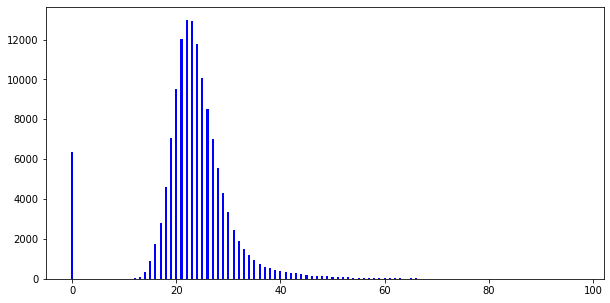

In [136]:
fig = plt.figure(figsize = (10, 5)) 
plt.bar(edades_deportistas.toPandas()['edad'], edades_deportistas.toPandas()['count'], color ='blue',  
        width = 0.4) 

### Distribucion Genero


In [162]:
genero_deportistas = deportista_df.groupBy('genero').count()

genero_deportistas.show()

+------+------+
|genero| count|
+------+------+
|     1|101590|
|     2| 33981|
+------+------+



In [177]:
genero_deportistas.toPandas()

,genero,count
0,1,101590
1,2,33981


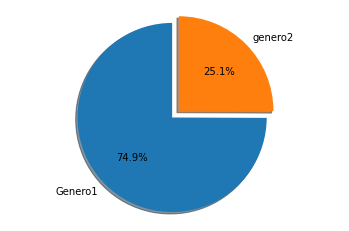

In [178]:
fig1, ax1 = plt.subplots()

labels = 'Genero1', 'genero2'
explode = (0, 0.1) 

ax1.pie(genero_deportistas.toPandas()['count'], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Cantidad de participantes por Pais

In [189]:
deportiasta_pais_df = deportista_df.join(
        equipos_df, 
        deportista_df.equipo_id == equipos_df.equipo_id,
        'left'
        )

deportiasta_pais_df.show(10)

+-------------+--------------------+------+----+------+----+---------+---------+--------------+-----------+
|deportista_id|              nombre|genero|edad|altura|peso|equipo_id|equipo_id|         sigla|descripcion|
+-------------+--------------------+------+----+------+----+---------+---------+--------------+-----------+
|            1|           A Dijiang|     1|  24|   180|80.0|      199|      199|         China|        CHN|
|            2|            A Lamusi|     1|  23|   170|60.0|      199|      199|         China|        CHN|
|            3| Gunnar Nielsen Aaby|     1|  24|     0| 0.0|      273|      273|       Denmark|        DEN|
|            4|Edgar Lindenau Aabye|     1|  34|     0| 0.0|      278|      278|Denmark/Sweden|        SWE|
|            5|Christine Jacoba ...|     2|  21|   185|82.0|      705|      705|   Netherlands|        NED|
|            6|     Per Knut Aaland|     1|  31|   188|75.0|     1096|     1096| United States|        USA|
|            7|        John 

In [212]:
top_ten_paises = deportiasta_pais_df\
                .groupBy('descripcion') \
                .count() \
                .sort(f.col('count').desc())

In [213]:
top_ten_paises.show(10)

+-----------+-----+
|descripcion|count|
+-----------+-----+
|        USA| 9621|
|        GBR| 6244|
|        FRA| 6161|
|        ITA| 4918|
|        CAN| 4789|
|        GER| 4612|
|        JPN| 4066|
|        AUS| 3799|
|        SWE| 3790|
|        POL| 2966|
+-----------+-----+
only showing top 10 rows



In [47]:
deportistas_paises_df = top_ten_paises.toPandas()

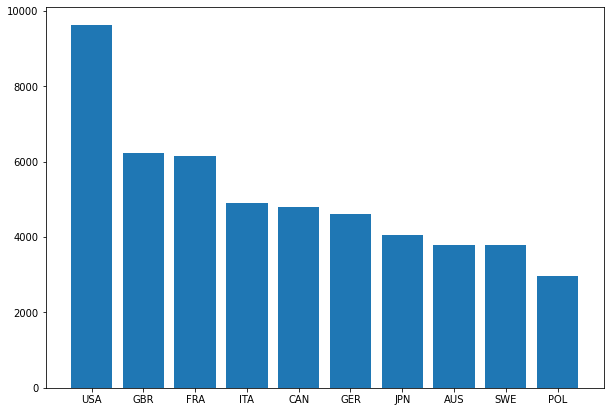

In [48]:
pais = deportistas_paises_df['descripcion']
cantidad = deportistas_paises_df['count']
  
# Figure Size 
fig = plt.figure(figsize =(10, 7)) 
  
# Horizontal Bar Plot 
plt.bar(pais[0:10], cantidad[0:10]) 
  
# Show Plot 
plt.show() 

### Top 20 deportistas mas medallas

In [51]:
total_medals_df = medallas_df.filter(medallas_df.medalla != "NA")\
    .groupby('deportista_id').count()\
    .sort(f.col('count').desc())

total_medals_df.show()

+-------------+-----+
|deportista_id|count|
+-------------+-----+
|        94406|   28|
|        67046|   18|
|         4198|   15|
|        74420|   13|
|        89187|   13|
|       109161|   13|
|        11951|   13|
|        70965|   12|
|        57998|   12|
|        23426|   12|
|       119922|   12|
|        85286|   12|
|        35550|   12|
|        87390|   12|
|       121258|   12|
|        89706|   11|
|        11642|   11|
|       113912|   11|
|        21402|   11|
|        18826|   11|
+-------------+-----+
only showing top 20 rows



In [69]:
deportista_medallas = deportista_df.join(
    total_medals_df,
    deportista_df.deportista_id == total_medals_df.deportista_id
    ).sort(f.col('count').desc())

deportista_medallas.show(20)

+-------------+--------------------+------+----+------+----+---------+-------------+-----+
|deportista_id|              nombre|genero|edad|altura|peso|equipo_id|deportista_id|count|
+-------------+--------------------+------+----+------+----+---------+-------------+-----+
|        94406| Michael Fred Phelps|     1|  15|   193|91.0|     1096|        94406|   28|
|        67046|Larysa Semenivna ...|     2|  21|   161|52.0|      978|        67046|   18|
|         4198|Nikolay Yefimovic...|     1|  19|   166|60.0|      978|         4198|   15|
|       109161|Borys Anfiyanovyc...|     1|  24|   171|71.0|      978|       109161|   13|
|        89187|         Takashi Ono|     1|  20|   160|58.0|      514|        89187|   13|
|        74420| Edoardo Mangiarotti|     1|  17|     0| 0.0|      507|        74420|   13|
|        11951| Ole Einar Bjrndalen|     1|  20|   178|65.0|      742|        11951|   13|
|        23426|Natalie Anne Coug...|     2|  21|   173|63.0|     1096|        23426|   12|

### Medallas por pais top 20

In [90]:
top_medals = deportista_medallas.join(
    equipos_df,
    deportista_medallas.equipo_id == equipos_df.equipo_id
)

In [89]:
top_medals.groupBy('descripcion').sum('count') \
    .withColumnRenamed('sum(count)', 'medallas totales') \
    .sort(f.col('medallas totales').desc()).show()

+-----------+----------------+
|descripcion|medallas totales|
+-----------+----------------+
|        USA|            5643|
|        URS|            2660|
|        GBR|            2045|
|        GER|            2045|
|        FRA|            1785|
|        ITA|            1627|
|        SWE|            1537|
|        CAN|            1347|
|        AUS|            1314|
|        HUN|            1131|
|        GDR|            1084|
|        NED|            1039|
|        NOR|            1033|
|        RUS|            1003|
|        CHN|             991|
|        JPN|             913|
|        FIN|             900|
|        SUI|             690|
|        ROU|             658|
|        KOR|             642|
+-----------+----------------+
only showing top 20 rows

